# Exercise n+1: PCA

## Goals

* Understand how PCA is computed
* Visualize a single-cell dataset with PCA
* Understand how different biological axes of variation are separated into different components

In [ ]:
!pip install --user scprep

## 1. Computing PCA on the UCI wine dataset

In [1]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.preprocessing
import sklearn.datasets

#### Load the data

In [2]:
wine = sklearn.datasets.load_wine()

# Access the numerical data from the wine Bunch
data = wine['data']

# Load data about the rows and columns
feature_names = wine['feature_names']

# Load cultivar information about each wine
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])

# Create nice names for each row
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])

# use the sklearn StandardScaler to scale to mean 0, variance 1
data = sklearn.preprocessing.StandardScaler().fit_transform(data)

# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
Wine1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
Wine2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
Wine3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
Wine4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### Compute PCA manually

Text(0, 0.5, 'Explained Variance')

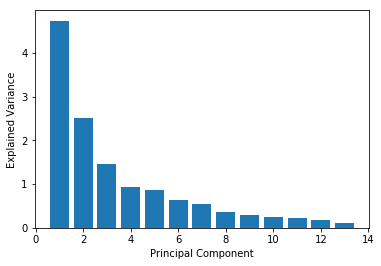

In [3]:
# compute the sample covariance matrix
Sigma = np.cov(np.transpose(data))

# compute the eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)

# sort the eigenvectors in order of decreasing eigenvalue
order = np.argsort(eigenvalues)[::-1] # [::-1] reverses the order of a list
eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:,order]

# plot the eigenvalues
plt.bar(np.arange(len(eigenvalues))+1, eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

In [5]:
n = ???

# take only the first n eigenvectors and eigenvalues
eigenvectors, eigenvalues = eigenvectors[:,:n], eigenvalues[:n]

# project the data onto the principal directions by matrix multiplication
data_pca = data @ eigenvectors

data_pca.head()

,0,1,2,3,4,5,6
Wine0,-3.316751,1.443463,0.165739,-0.215631,0.693043,-0.223880,-0.596427
Wine1,-2.209465,-0.333393,2.026457,-0.291358,-0.257655,-0.927120,-0.053776
Wine2,-2.516740,1.031151,-0.982819,0.724902,-0.251033,0.549276,-0.424205
Wine3,-3.757066,2.756372,0.176192,0.567983,-0.311842,0.114431,0.383337
Wine4,-1.008908,0.869831,-2.026688,-0.409766,0.298458,-0.406520,-0.444074


In [6]:
my_cultivar = "Cultivar0" # alternative: "Cultivar1", "Cultivar2"

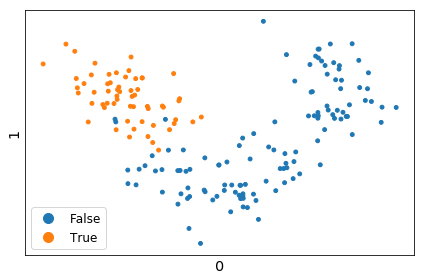

In [7]:
scprep.plot.scatter(x=data_pca[0], y=data_pca[1],
                    c=cultivars==my_cultivar, ticks=False)

#### Exercise n+1.1 - pick through the first few principal components and see which best separate your chosen cultivar

In [ ]:
scprep.plot.scatter(x=data_pca[???], y=data_pca[???],
                    c=cultivars==my_cultivar, ticks=False)

## 1. Downloading the Retinal Bipolar dataset

In [11]:
# download the data from Google Drive
scprep.io.download.download_google_drive("1bkOEkDJS1B8HeQUXtPHoo66qZiVK0ryC",
                                         "shekhar_data.zip")
scprep.io.download.unzip("shekhar_data.zip")

In [9]:
# read in the data
data = scprep.io.load_mtx("shekhar_data/matrix.mtx",
                         cell_names="shekhar_data/cell_names.tsv",
                         gene_names="shekhar_data/gene_names.tsv")
data.head()

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610025J13Rik,...,n-R5s77,n-R5s8,n-R5s85,n-R5s86,n-R5s87,n-R5s88,n-R5s92,n-R5s93,n-R5s95,n-R5s96
Bipolar1_CCCACAAGACTA,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_TCGCCTCGTAAG,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_CAAAGCATTTGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_CTTTTGATTGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_GCTCCAATGACA,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# read in the cluster labels
clusters = scprep.io.load_tsv("shekhar_data/shekhar_clusters.tsv")
clusters.head()

,CLUSTER,SUB-CLUSTER,CELLTYPE
Bipolar1_CCCACAAGACTA,11.0,11,BC5D
Bipolar1_TCGCCTCGTAAG,23.0,23,23
Bipolar1_CAAAGCATTTGC,5.0,5,BC6
Bipolar1_CTTTTGATTGAC,4.0,4,BC7
Bipolar1_GCTCCAATGACA,1.0,1,Rod BC


In [11]:
data.shape

(44994, 24904)

## 2. Preprocessing

You should be familiar with the preprocessing workflow from earlier today, but we'll walk through it step by step anyway.

#### Library size filtering

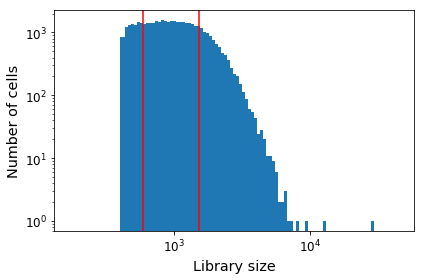

In [12]:
scprep.plot.plot_library_size(data, percentile=(20,80))

Notice that there are no cells with library size smaller than ~500. This dataset has already been filtered for library size, so we don't _need_ to do anything, but for speed and memory concerns we'll filter it a bit more aggressively.

In [13]:
data, clusters = scprep.filter.filter_library_size(data, clusters, percentile=(20,80))

#### Library size normalization

In [14]:
data = scprep.normalize.library_size_normalize(data)

#### Mitochondrial DNA filtering

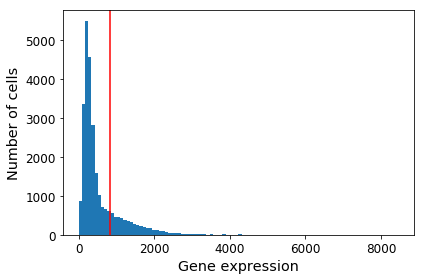

In [15]:
scprep.plot.plot_gene_set_expression(data, starts_with="mt-", percentile=80)

There is a long tail of high mitochondrial expression. Since we normalized library size to 10,000, a mitochondrial expression of 8,000 means nearly the entire droplet was mitochondrial. We should remove these.

In [16]:
data, clusters = scprep.filter.filter_gene_set_expression(
    data, clusters, starts_with="mt-", keep_cells='below', percentile=80)
data.shape

(21552, 24904)

#### Rare gene filtering

Now we've removed some cells, it's likely that there are some genes with close to zero total counts. These are just a waste of space.

In [17]:
data = scprep.filter.filter_rare_genes(data, min_cells=10)
data.shape

(21552, 15524)

#### Square root transform

In [18]:
data = scprep.transform.sqrt(data)

## 3. PCA

This dataset consists of many cell types, which were mostly identified as Amacrine cells, Muller Glia, Rod Bipolar cells, and many subtypes of Cone Bipolar cells in [Shekhar et. al, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5003425/). 

#### Separating celltypes by selecting appropriate plotting features

In [19]:
clusters['CELLTYPE'].unique()

array(['BC5A', 'BC1B', 'BC6', 'Rod BC', 'BC3B', 'Muller Glia', 'BC5B',
       '21', '19', 'BC5C', 'BC3A', 'BC5D', 'BC7', 'BC2', 'BC1A', '17',
       'BC4', '18', 'BC8/9_1', '23', '-1', '24', 'BC8/9_2', 'Rod PR',
       'Amacrine_2', 'Amacrine_1', 'Cone PR', '26', '25'], dtype=object)

First, let's try to separate out the Muller Glia cells from the rest of the dataset using a couple of known marker genes.

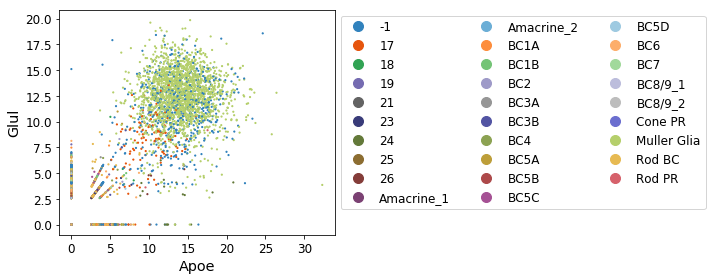

In [22]:
scprep.plot.scatter(data['Apoe'], data['Glul'], c=clusters['CELLTYPE'],
                    figsize=(10,4), legend_anchor=(1,1))

Notice that the Muller Glia cells are mostly separate from the rest, except for a smattering of cells labelled '-1'. These cells were not assigned a cluster in the original study, so let's see what the plot looks like without them.

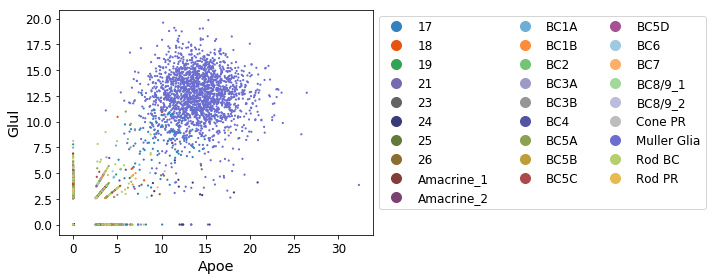

In [23]:
scprep.plot.scatter(data['Apoe'], data['Glul'], c=clusters['CELLTYPE'],
                    mask=clusters['CELLTYPE'] != '-1',
                    figsize=(10,4), legend_anchor=(1,1))

Okay, so the Muller Glia cells are relatively easy to identify using this combination of genes. But how should we choose such combinations of genes? With 20,000 to choose from, it's no easy feat. This is where PCA comes in.

#### Computing PCA quickly

There's a faster way to do PCA, and fortunately it's already implemented for us in `scikit-learn` and `scprep`.

In [24]:
# first, we'll filter out those unlabeled cells
data, clusters = scprep.select.select_rows(data, clusters, idx=clusters['CELLTYPE'] != '-1')

import sklearn.decomposition
pca_op = sklearn.decomposition.PCA(n_components=100) # we could also do scprep.reduce.pca(data, 100)
data_pca = pca_op.fit_transform(scprep.utils.toarray(data))
data_pca

array([[-1.72277546, 15.83948936,  4.27379701, ...,  1.93725507,
         1.86480822,  2.31821285],
       [ 0.6189253 , 12.84302246, -2.85684789, ...,  0.27277381,
        -2.70562803,  0.19619069],
       [ 0.89890891,  6.57228168, 17.78928636, ..., -0.34857435,
        -1.36027763, -1.27733996],
       ...,
       [-0.90173738, 10.82703838, -0.82659748, ...,  0.15077353,
        -4.62595168,  0.32849575],
       [-0.63963636,  9.59975418, -1.60284935, ...,  0.25310785,
         2.60842683,  1.26172156],
       [-0.99938247,  9.87576752, -4.40313743, ..., -3.8262632 ,
         1.03266591, -0.77867375]])

Note that since we used `sklearn` here, `data_pca` is a numpy array, not a DataFrame. We could have avoided this conversion by using `scprep.reduce.pca`, but `sklearn` has some additional functionality that we will use later.

#### Examining the first two principal components

Now we have computed the PCA, we can plot the first two directions to see how well our glial cells separate.

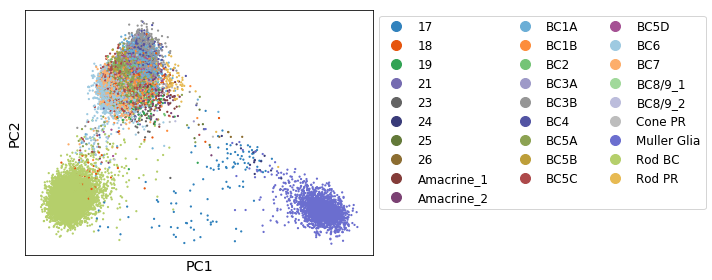

In [26]:
scprep.plot.scatter2d(data_pca, c=clusters['CELLTYPE'], figsize=(10,4),
                      ticks=False, label_prefix='PC', legend_anchor=(1,1))

Wow, look at that! The glial cells separate perfectly from the Rod Bipolar cells (lime green) and the Cone Bipolar cells (most everything else).

#### Exercise n+1.2 - Examining principal components

Each principal component can be thought of as representing some latent state in the data. For example, wee see that the first component largely separates glia from bipolar cells, and the second separates rod bipolar cells from cone bipolar cells. Now it's your turn - pick a cell type and try to find the best principal component to separate it from the rest of the cells.

In [27]:
print(clusters['CELLTYPE'].unique())

['BC5A' 'BC1B' 'BC6' 'Rod BC' 'BC3B' 'Muller Glia' 'BC5B' '21' '19' 'BC5C'
 'BC3A' 'BC5D' 'BC7' 'BC2' 'BC1A' '17' 'BC4' '18' 'BC8/9_1' '23' '24'
 'BC8/9_2' 'Rod PR' 'Amacrine_2' 'Amacrine_1' 'Cone PR' '26' '25']


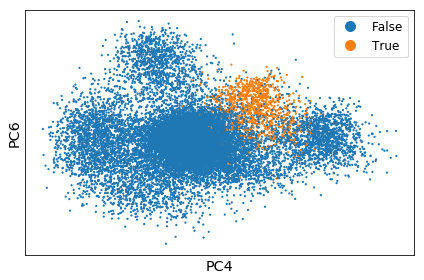

In [36]:
my_celltype = "???" # pick any named cell type
x_pc = ??? # pick a number >= 1
y_pc = ??? # pick a number >= 1
scprep.plot.scatter(data_pca[:,x_pc-1], data_pca[:,y_pc-1], c=clusters['CELLTYPE'] == my_celltype,
                   ticks=False, xlabel='PC{}'.format(x_pc), ylabel='PC{}'.format(y_pc))

my_celltype = "BC7"
x_pc = 4
y_pc = 6
scprep.plot.scatter(data_pca[:,x_pc-1], data_pca[:,y_pc-1], c=clusters['CELLTYPE'] == my_celltype,
                   ticks=False, xlabel='PC{}'.format(x_pc), ylabel='PC{}'.format(y_pc))

#### Examining loadings associated with principal components

The principal components are described by a linear combination of the original features, so we can use the coefficients of these principal directions (called "loadings") to understand which features are driving the separation. We'll do it here for the first two components.

In [37]:
pc_loadings = pd.DataFrame(pca_op.components_, columns=data.columns)
pc_loadings.head()

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610030E20Rik,...,mt-Tl1,mt-Tl2,mt-Tm,mt-Tp,mt-Tq,mt-Ts2,mt-Tt,mt-Tv,mt-Tw,mt-Ty
0,0.000084,0.002169,-0.001397,0.002310,0.000015,0.001371,-0.001470,-0.000044,0.000915,0.000170,...,-0.000080,0.000014,-0.000515,-0.001998,-0.000153,-0.000144,-0.000299,-0.000098,-0.000147,-0.000165
1,-0.000062,0.002681,-0.001601,-0.001495,-0.000358,0.000474,0.001274,-0.000032,0.000127,0.000029,...,0.000016,0.000080,-0.000029,-0.001670,-0.000028,0.000096,-0.000190,0.000145,-0.000204,-0.000010
2,-0.000027,-0.003889,-0.005795,0.000204,-0.000682,-0.001544,0.001007,0.000039,-0.002309,0.000483,...,0.000109,0.000057,-0.000220,0.002370,0.000122,0.000145,0.000074,0.000106,-0.000084,0.000176
3,0.000192,-0.001237,-0.000504,-0.000056,-0.000546,0.001529,0.000178,-0.000031,-0.000924,0.001962,...,0.000094,-0.000119,0.000610,0.001078,0.000258,-0.000260,0.000246,0.000045,0.000064,0.000202
4,0.000255,-0.000096,-0.005943,0.000612,-0.000557,0.000192,0.002552,-0.000185,-0.005831,0.005755,...,-0.000297,-0.000168,-0.000497,0.001469,0.000690,-0.000124,-0.000761,-0.000098,-0.000306,0.000107


In [38]:
np.abs(pc_loadings.loc[0]).sort_values(ascending=False).head(20)

Calm1     0.253430
Apoe      0.243300
Glul      0.209790
Pcp2      0.208732
Trpm1     0.156030
Acsl3     0.142262
Clu       0.134691
Dkk3      0.132221
Gng13     0.129157
Rlbp1     0.127997
Malat1    0.124457
Pcp4      0.120903
Chgb      0.119972
Sparc     0.112543
Gnao1     0.096658
Slc1a3    0.092690
Isl1      0.092633
Jun       0.090011
Dbi       0.089774
Car2      0.088967
Name: 0, dtype: float64

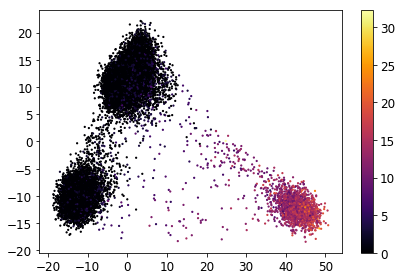

In [39]:
scprep.plot.scatter(x=data_pca[:,0], y=data_pca[:,1], c=data['Apoe'])

In [40]:
np.abs(pc_loadings.loc[1]).sort_values(ascending=False).head(20)

Calm1      0.315911
Pcp2       0.245478
Malat1     0.180046
Trpm1      0.167485
Chgb       0.160912
Apoe       0.142292
Acsl3      0.137999
Pcp4       0.119888
Glul       0.119241
Scgn       0.115872
Car8       0.114404
Prkca      0.112234
App        0.104204
Mt1        0.102639
Sncb       0.102490
Ablim1     0.101395
Qpct       0.094500
Ccdc136    0.090395
Gria2      0.088813
Gngt1      0.085786
Name: 1, dtype: float64

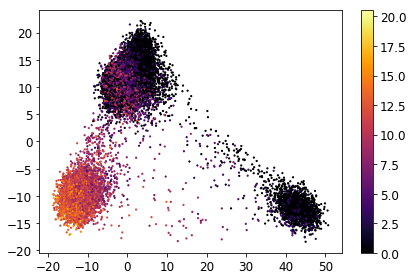

In [42]:
scprep.plot.scatter(x=data_pca[:,0], y=data_pca[:,1], c=data['???'])

scprep.plot.scatter(x=data_pca[:,0], y=data_pca[:,1], c=data['Pcp2'])

#### Exercise n+1.3 - examine the loadings of the principal component(s) that you used to identify your cell type of choice and color the PCA plot by the top genes

In [ ]:
???

## 4. Save data for later

We'll save the preprocessed data file for later use.

In [43]:
data.to_pickle("shekhar_data.pkl")

clusters.to_pickle("shekhar_clusters.pkl")